<a href="https://colab.research.google.com/github/JYEmm-eng/Final-Team9/blob/main/%EA%B0%90%EB%8F%85%EC%8B%9C%EA%B0%81%ED%99%94%EA%B9%8C%EC%A7%80%2C%EC%B6%94%EB%A1%A0%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Movie/TMDB_processed_final (1).csv")

In [ ]:
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,genres,production_companies,production_countries,spoken_languages,keywords,director,cast,ROI,SR,y_result
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...",415.957978,3,3
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Michael Ca...",325.290428,3,3
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",443.004564,3,3
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",1133.631235,3,3
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",590.370689,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8238,407873,For Colored Girls Who Have Considered Suicide ...,10.000,1,Released,1982-02-23,100000,78,False,1000000,...,"Drama, Romance",Kultur Video,United States of America,English,"broadway show, black woman",Oz Scott,"Sarita Allen, Trazana Beverley, Laurie Carlos,...",-90.000000,0,0
8239,402714,Sming,6.000,1,Released,2014-09-11,89038,105,False,15000000,...,"Drama, Action, Horror",Fast Time Motion Pictures,Thailand,Thai,"tiger, thailand, hunt",Pan Visitsak,"Thanyaboon Boonprasert, Geoffrey Giuliano, Nae...",-99.406413,0,0
8240,384746,Money No Enough,5.000,1,Released,1998-05-07,4100000,98,False,600000,...,Comedy,JSP Films,Singapore,"Mandarin, English","money, debt, financial crisis, financial problem",Tay Teck Lock,"Jack Neo, Mark Lee, Henry Thia, John Cheng, Ji...",583.333333,3,2
8241,25149,Full Grown Men,6.000,1,Released,2006-04-27,13716,78,False,2000000,...,"Comedy, Drama",Grottofilms,United States of America,English,"mermaid, road trip, amusement park, childhood ...",David Munro,"Matt McGrath, Judah Friedlander, Alan Cumming,...",-99.314200,0,0


In [ ]:
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
df1 = df.copy()

In [ ]:
df2 = df.copy()

전처리코드


In [ ]:
import pandas as pd



# 연도순 정렬 (release_date 컬럼이 날짜형인지 확인 후 변환)
df1['release_date'] = pd.to_datetime(df1['release_date'])
df1 = df1.sort_values(by=['director', 'release_date']).reset_index(drop=True)

# 첫 번째 칼럼: 감독이 이전에 찍은 영화의 개수
df1['di_count'] = (
    df1.groupby('director')
       .cumcount()
)

# 두 번째 칼럼: 감독이 이전에 찍은 영화 중 성공(y_result>=2) 개수
df1['sucessed'] = (
    df1.groupby('director')['y_result']
       .apply(lambda x: (x >= 2).cumsum().shift(fill_value=0))
       .reset_index(drop=True)
)

# 세 번째 칼럼: ratio = sucessed / di_count (0 division 방지)
df1['ratio'] = df1.apply(
    lambda row: row['sucessed'] / row['di_count'] if row['di_count'] > 0 else 0,
    axis=1
)



df1.tail(200)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,spoken_languages,keywords,director,cast,ROI,SR,y_result,di_count,sucessed,ratio
8043,242095,The Signal,5.977,1540,Released,2014-03-15,2665322,97,False,4000000,...,English,"hacker, virtual reality, road trip, super powe...",William Eubank,"Brenton Thwaites, Olivia Cooke, Beau Knapp, La...",-33.366950,0,0,0,0,0.0
8044,443791,Underwater,6.298,2813,Released,2020-01-08,40882928,95,False,50000000,...,English,"monster, self sacrifice, deep sea, animal atta...",William Eubank,"Kristen Stewart, Vincent Cassel, Mamoudou Athi...",-18.234144,0,0,1,0,0.0
8045,34377,The Boys in the Band,7.125,84,Released,1970-03-16,3500000,118,False,5500000,...,English,"new york city, birthday party, based on play o...",William Friedkin,"Kenneth Nelson, Leonard Frey, Peter White, Cli...",-36.363636,0,0,0,0,0.0
8046,1051,The French Connection,7.539,1630,Released,1971-10-09,41158757,104,False,1800000,...,"English, French","drug dealer, new york city, police brutality, ...",William Friedkin,"Gene Hackman, Roy Scheider, Fernando Rey, Tony...",2186.597611,3,2,1,0,0.0
8047,9552,The Exorcist,7.720,7247,Released,1973-12-26,441405644,122,False,12000000,...,"German, French, Latin, Arabic, Greek, English","religion and supernatural, exorcism, holy wate...",William Friedkin,"Ellen Burstyn, Linda Blair, Jason Miller, Max ...",3578.380367,3,3,2,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8238,395762,Father Son Therapy,5.425,114,Released,2016-12-28,1453270,92,False,7230000,...,French,"group therapy, father son relationship",Émile Gaudreault,"Richard Berry, Waly Dia, Jacques Gamblin, Bapt...",-79.899447,0,0,1,0,0.0
8239,745611,Delicious,6.955,221,Released,2021-09-08,8356097,112,False,5000000,...,French,"restaurant, food, chef, french cuisine, gastro...",Éric Besnard,"Isabelle Carré, Grégory Gadebois, Benjamin Lav...",67.121940,0,1,0,0,0.0
8240,77338,The Intouchables,8.277,16083,Released,2011-11-02,426588510,113,False,13000000,...,"English, French","friendship, male friendship, based on true sto...",Éric Toledano,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",3181.450077,3,3,0,0,0.0
8241,15049,Bon Cop Bad Cop,6.396,188,Released,2006-07-06,12671300,116,False,8000000,...,"English, French","canada, police, murder, killer, buddy cop",Érik Canuel,"Patrick Huard, Colm Feore, Michel Beaudry, Pat...",58.391250,0,1,0,0,0.0


In [ ]:
#df1.iloc[1000:1020]
df1[df1['director']=='Bryan Singer']

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,spoken_languages,keywords,director,cast,ROI,SR,y_result,di_count,sucessed,ratio
992,629,The Usual Suspects,8.195,9604,Released,1995-07-19,23341568,106,False,6000000,...,"Spanish, English, French, Hungarian","new york city, relatives, heist, gay interest,...",Bryan Singer,"Stephen Baldwin, Gabriel Byrne, Benicio del To...",289.026133,3,2,0,0,0.000000
993,9445,Apt Pupil,6.530,584,Released,1998-10-23,8863193,107,False,14000000,...,"English, German","high school, based on novel or book, secret id...",Bryan Singer,"Brad Renfro, Ian McKellen, Bruce Davison, Elia...",-36.691479,0,0,1,1,1.000000
994,36657,X-Men,6.996,10530,Released,2000-07-13,296339527,104,False,75000000,...,English,"superhero, mutant, based on comic, superhuman",Bryan Singer,"Hugh Jackman, Patrick Stewart, Ian McKellen, F...",295.119369,3,3,2,1,0.500000
995,36658,X2,7.029,9417,Released,2003-04-27,407711549,133,False,110000000,...,"English, German, Italian","superhero, mutant, based on comic, superhuman,...",Bryan Singer,"Patrick Stewart, Hugh Jackman, Brian Cox, Ian ...",270.646863,3,2,3,2,0.666667
996,1452,Superman Returns,5.738,3859,Released,2006-06-28,391081192,154,False,270000000,...,"English, French, German","saving the world, superhero, invulnerability, ...",Bryan Singer,"Brandon Routh, Kate Bosworth, Kevin Spacey, Ja...",44.844886,0,1,4,3,0.750000
997,2253,Valkyrie,6.909,3384,Released,2008-12-25,200276000,121,False,75000000,...,"English, German","friendship, suicide, plan, berlin, germany, hu...",Bryan Singer,"Tom Cruise, Kenneth Branagh, Bill Nighy, Teren...",167.034667,2,2,5,3,0.600000
998,81005,Jack the Giant Slayer,5.818,4655,Released,2013-02-27,197687603,114,False,195000000,...,English,"based on fairy tale, giant",Bryan Singer,"Nicholas Hoult, Eleanor Tomlinson, Ewan McGreg...",1.378258,0,0,6,4,0.666667
999,127585,X-Men: Days of Future Past,7.500,14433,Released,2014-05-15,747862775,132,False,250000000,...,"English, French, Russian, Vietnamese","1970s, mutant, time travel, based on comic, su...",Bryan Singer,"Hugh Jackman, James McAvoy, Michael Fassbender...",199.145110,2,2,7,4,0.571429
1000,246655,X-Men: Apocalypse,6.513,12215,Released,2016-05-18,543934787,144,False,178000000,...,"Arabic, English, German, Polish, Russian, Swahili","hero, superhero, mutant, based on comic, super...",Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",205.581341,3,3,8,5,0.625000
1001,424694,Bohemian Rhapsody,7.997,15965,Released,2018-10-24,903992901,135,False,52000000,...,English,"london, england, aids, musician, 1970s, queen,...",Bryan Singer,"Rami Malek, Gwilym Lee, Ben Hardy, Joseph Mazz...",1638.447887,3,3,9,6,0.666667


In [ ]:
df1[['sucessed','ratio']].describe()

,sucessed,ratio
count,8243.000000,8243.000000
mean,1.090986,0.275032
std,2.114181,0.371529
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.500000
max,25.000000,1.000000


In [ ]:
df1

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,spoken_languages,keywords,director,cast,ROI,SR,y_result,di_count,sucessed,ratio
0,69402,Kireedam,5.800,17,Released,2007-07-20,500000,157,False,500000,...,Tamil,"police, gangster, injustice",A. L. Vijay,"Ajith Kumar, Rajkiran, Ajay, Trisha Krishnan, ...",0.000000,0,0,0,0,0.000000
1,69401,Dheena,6.000,13,Released,2001-01-14,500000,157,False,500000,...,Tamil,"street gang, gangster, thug, goon",A. R. Murugadoss,"Ajith Kumar, Suresh Gopi, Laila, Shyam Ganesh,...",0.000000,0,0,0,0,0.000000
2,14070,Ghajini,6.989,348,Released,2008-12-25,76000000,186,False,9100000,...,Hindi,"tattoo, businessman, love at first sight, gang...",A. R. Murugadoss,"Aamir Khan, Asin Thottumkal, Jiah Khan, Pradee...",735.164835,3,2,1,0,0.000000
3,86718,7Aum Arivu,6.600,48,Released,2011-10-26,98900000,168,False,16000000,...,"English, Tamil","martial arts, kung fu, biological weapon, budd...",A. R. Murugadoss,"Suriya, Shruti Haasan, Johnny Nguyen, Ashwin K...",518.125000,3,2,2,1,0.500000
4,143010,Thuppakki,7.100,76,Released,2012-11-13,28000000,165,False,11000000,...,"English, Hindi, Tamil","terrorist plot, indian army, army intelligence...",A. R. Murugadoss,"Vijay, Kajal Aggarwal, Vidyut Jammwal, Sathyan...",154.545455,2,1,3,2,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8238,395762,Father Son Therapy,5.425,114,Released,2016-12-28,1453270,92,False,7230000,...,French,"group therapy, father son relationship",Émile Gaudreault,"Richard Berry, Waly Dia, Jacques Gamblin, Bapt...",-79.899447,0,0,1,0,0.000000
8239,745611,Delicious,6.955,221,Released,2021-09-08,8356097,112,False,5000000,...,French,"restaurant, food, chef, french cuisine, gastro...",Éric Besnard,"Isabelle Carré, Grégory Gadebois, Benjamin Lav...",67.121940,0,1,0,0,0.000000
8240,77338,The Intouchables,8.277,16083,Released,2011-11-02,426588510,113,False,13000000,...,"English, French","friendship, male friendship, based on true sto...",Éric Toledano,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",3181.450077,3,3,0,0,0.000000
8241,15049,Bon Cop Bad Cop,6.396,188,Released,2006-07-06,12671300,116,False,8000000,...,"English, French","canada, police, murder, killer, buddy cop",Érik Canuel,"Patrick Huard, Colm Feore, Michel Beaudry, Pat...",58.391250,0,1,0,0,0.000000


In [ ]:
# df1을 CSV 파일로 저장
df1.to_csv("tmdb_profinal_di_counts.csv", index=False)


In [ ]:
from google.colab import files

files.download("tmdb_profinal_di_counts.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

T-TEST

In [ ]:
import pandas as pd
from scipy import stats


# ratio 기준으로 두 그룹 나누기 (중위수/평균/임계치 기준 선택 가능)
threshold = df1['ratio'].median()  # 여기서는 median(중위수) 기준으로 나눔

group_high = df1[df1['ratio'] > threshold]['y_result']
group_low = df1[df1['ratio'] <= threshold]['y_result']

# 독립표본 t-test
t_stat, p_value = stats.ttest_ind(group_high, group_low, equal_var=False)  # Welch’s t-test

print("고 ratio 그룹(양수) y_result 평균:", group_high.mean())
print("저 ratio 그룹(음수) y_result 평균:", group_low.mean())
print("t-통계량:", t_stat)
print("p-값:", p_value)

if p_value < 0.05:
    print("✅ 유의수준 0.05에서 두 그룹 간 차이가 통계적으로 유의합니다.")
else:
    print("❌ 유의한 차이를 찾지 못했습니다.")


고 ratio 그룹(양수) y_result 평균: 1.3578359306086445
저 ratio 그룹(음수) y_result 평균: 1.0220983064849236
t-통계량: 14.39050662846491
p-값: 2.8282163128060252e-46
✅ 유의수준 0.05에서 두 그룹 간 차이가 통계적으로 유의합니다.


아노바검정

In [ ]:
import pandas as pd
from scipy import stats

# df1이 있다고 가정
df = df1.copy()

# 세 구간 정의
group1 = df[(df['ratio'] >= 0.0) & (df['ratio'] < 0.2)]['y_result']   # [0,0.2)
group2 = df[(df['ratio'] >= 0.2) & (df['ratio'] < 0.7)]['y_result']   # [0.2,0.7)
group3 = df[(df['ratio'] >= 0.7) & (df['ratio'] < 1.0)]['y_result']  # [0.7,1]

# 샘플 수 확인
print("샘플 수:")
print("[0,0.2):", len(group1))
print("[0.2,0.7):", len(group2))
print("[0.7,1]:", len(group3))
print()

# 일원분산분석 (One-way ANOVA)
f_stat, p_value = stats.f_oneway(group1, group2, group3)

print("ANOVA F-통계량:", f_stat)
print("ANOVA p-value :", p_value)

# 각 그룹 평균 출력
print("\n그룹 평균 y_result: ratio 구간이 높아질수록, 즉 감독의 전작 성공률이 높아질수 평균 y_result 상승")
print("[0,0.2):", group1.mean())
print("[0.2,0.7):", group2.mean())
print("[0.7,1]:", group3.mean())


샘플 수:
[0,0.2): 4894
[0.2,0.7): 1893
[0.7,1]: 362

ANOVA F-통계량: 80.52389307925672
ANOVA p-value : 2.6131412778855644e-35

그룹 평균 y_result: ratio 구간이 높아질수록, 즉 감독의 전작 성공률이 높아질수 평균 y_result 상승
[0,0.2): 1.0247241520228851
[0.2,0.7): 1.241944004226096
[0.7,1]: 1.6243093922651934


시각화

/tmp/ipython-input-3169326856.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="y_result", data=plot_df, palette="Set2")


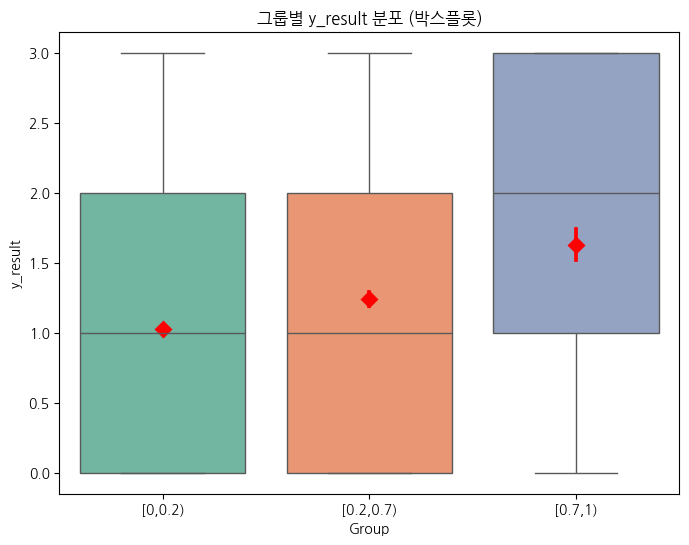

/tmp/ipython-input-3169326856.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Group", y="y_result", data=plot_df, palette="Set2", ci=95)
/tmp/ipython-input-3169326856.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Group", y="y_result", data=plot_df, palette="Set2", ci=95)


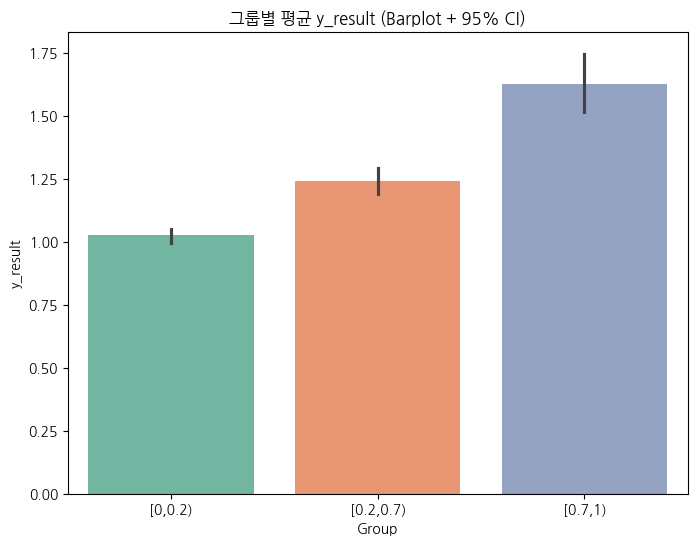

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터프레임 df 에서 그룹 나누기
group1 = df1[(df1['ratio'] >= 0.0) & (df1['ratio'] < 0.2)]['y_result']
group2 = df1[(df1['ratio'] >= 0.2) & (df1['ratio'] < 0.7)]['y_result']
group3 = df1[(df1['ratio'] >= 0.7) & (df1['ratio'] < 1.0)]['y_result']

# 시각화를 위해 데이터 묶기
plot_df = pd.DataFrame({
    "y_result": pd.concat([group1, group2, group3], ignore_index=True),
    "Group": (["[0,0.2)"] * len(group1)) +
             (["[0.2,0.7)"] * len(group2)) +
             (["[0.7,1)"] * len(group3))
})

# 박스플롯
plt.figure(figsize=(8,6))
sns.boxplot(x="Group", y="y_result", data=plot_df, palette="Set2")
sns.pointplot(x="Group", y="y_result", data=plot_df, estimator="mean",
              color="red", markers="D", linestyles="")
plt.title("그룹별 y_result 분포 (박스플롯)")
plt.show()

# 바플롯 (평균 + 신뢰구간)
plt.figure(figsize=(8,6))
sns.barplot(x="Group", y="y_result", data=plot_df, palette="Set2", ci=95)
plt.title("그룹별 평균 y_result (Barplot + 95% CI)")
plt.show()


사후검정TUKEY HSD

In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

# --- 사용하신 그룹 그대로 재사용 ---
# df1 -> df 복사, group1/2/3는 이미 정의되어 있다고 가정
df = df1.copy()
group1 = df[(df['ratio'] >= 0.0) & (df['ratio'] < 0.2)]['y_result']   # [0,0.2)
group2 = df[(df['ratio'] >= 0.2) & (df['ratio'] < 0.7)]['y_result']   # [0.2,0.7)
group3 = df[(df['ratio'] >= 0.7) & (df['ratio'] < 1.0)]['y_result']   # [0.7,1)

# --- (선택) 등분산성 체크: 등분산이 아니면 Tukey 대신 Games-Howell 권장 ---
lev_stat, lev_p = stats.levene(group1, group2, group3, center='median')
print(f"Levene 등분산성 p-value: {lev_p:.4g}")

# --- Tukey HSD 실행 ---
# 시각화/검정을 위해 하나의 시리즈로 묶고 그룹 라벨을 부여
y = pd.concat([group1, group2, group3], ignore_index=True)
g = (["[0,0.2)"] * len(group1) +
     ["[0.2,0.7)"] * len(group2) +
     ["[0.7,1)"] * len(group3))

tukey = pairwise_tukeyhsd(endog=y, groups=g, alpha=0.05)

print("\n[Tukey HSD 결과]")
print(tukey)  # 표 형태로 요약 출력

# 결과를 DataFrame으로 활용하고 싶다면
tukey_df = pd.DataFrame(
    tukey._results_table.data[1:],  # 헤더 제외
    columns=tukey._results_table.data[0]
)
print("\nDataFrame 형태 요약:")
print(tukey_df)

# --- (선택) 구간별 평균 차이 신뢰구간 플롯 ---
# tukey.plot_simultaneous()  # 주석 해제 시 신뢰구간 그래프 표시 (matplotlib 필요)
# import matplotlib.pyplot as plt; plt.show()


Levene 등분산성 p-value: 1.974e-09

[Tukey HSD 결과]
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
  [0,0.2) [0.2,0.7)   0.2172   0.0 0.1531 0.2813   True
  [0,0.2)   [0.7,1)   0.5996   0.0 0.4706 0.7285   True
[0.2,0.7)   [0.7,1)   0.3824   0.0 0.2466 0.5182   True
-------------------------------------------------------

DataFrame 형태 요약:
      group1     group2  meandiff  p-adj   lower   upper  reject
0    [0,0.2)  [0.2,0.7)    0.2172    0.0  0.1531  0.2813    True
1    [0,0.2)    [0.7,1)    0.5996    0.0  0.4706  0.7285    True
2  [0.2,0.7)    [0.7,1)    0.3824    0.0  0.2466  0.5182    True
